## Imports

In [1]:
# Using GPU: 
!CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"))
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/:$CUDNN_PATH/lib

In [2]:
import os, glob
os.chdir('..') 
PROJ_DIR = os.getcwd()
print(PROJ_DIR)
from collections import defaultdict, Counter
import pandas as pd
from IPython.display import HTML
import hate_datasets as dc
import kg_adaptation as kg_adapt
import identity_group_identification as model_f
from functions.helper import get_metrics, sample_error_partition, sample_true_partition
from functions.helper import entities_in_categories, find_elbow

dnames = ['xtremespeech', 'gabhatecorpus', 'hatexplain']
id_col, text_col = 'comment_id', 'predict_text'
# Evaluation variables
models_folder = os.path.join(PROJ_DIR, 'models')
error_entity_folder = os.path.join(PROJ_DIR, 'interpretations')
# Limit GPU device: CPU 0, GPU 1 or 2
#model_f.select_device(device_id="0", device_type='CPU')
model_f.select_device(device_id="1", device_type='GPU')

/app


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation
2023-04-04 09:52:24.486379: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 09:52:24.601054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 09:52:24.602767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 09:52:26.293490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Number of GPU available: 0


## Train and export hybrid and transformer based models

In [ ]:
! bash notebooks/train_models.sh

In [3]:
# Reproduce experiments from experiment pickle file: cross-validation
exp_files = sorted(glob.glob(os.path.join(models_folder, '*/*/*/exp_file.pkl')))
print(f' Cross-validation: {len(exp_files)} models')

 Cross-validation: 7 models


In [4]:
# Import hybrid, transformers, lexical models: out-of-domain evaluation
# use with predict function
models = []
# ... lexical
lexicon_path = os.path.join(PROJ_DIR, 'baselines', 'Toxic_Debias', 'word_based_bias_list_pruned.csv')
models.append(model_f.toxic_debias_load(lexicon_path=lexicon_path))
# ... hybrid (hierarchical)
hybrid_models = sorted(glob.glob(os.path.join(models_folder, 'hybrid/gso*/*hierarchical*')))
models += [model_f.model_load(hybrid_model) for hybrid_model in hybrid_models]
# ... transformers
transformer_model = sorted(glob.glob(os.path.join(models_folder, 'llm/gso*/roberta-base')))[0]
models.append(model_f.model_load(transformer_model))

print(f' Out-of-domain evaluation: {len(models)} models')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


 Out-of-domain evaluation: 5 models


## Evaluation

Overall loss: 0.6635
Label loss: nan
Accuracy by chance: 1.2650
Log-odds difference: 0.5423
ROC AUC: 0.8640
PR AUC: 0.8574
F1-score: 0.5101
Precision: 0.8420
Recall: 0.4358
Overall loss: 0.4810
Label loss: nan
Accuracy by chance: 1.6195
Log-odds difference: 1.43
ROC AUC: 0.9014
PR AUC: 0.8958
F1-score: 0.7809
Precision: 0.8824
Recall: 0.7032


/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Overall loss: 0.3716
Label loss: nan
Accuracy by chance: 1.7325
Log-odds difference: 1.823
ROC AUC: 0.9251
PR AUC: 0.9270
F1-score: 0.8487
Precision: 0.8933
Recall: 0.8085
Overall loss: 0.6684
Label loss: nan
Accuracy by chance: 1.2213
Log-odds difference: 0.4479
ROC AUC: 0.8302
PR AUC: 0.8257
F1-score: 0.4960
Precision: 0.8118
Recall: 0.4371


/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Overall loss: 0.4836
Label loss: nan
Accuracy by chance: 1.5878
Log-odds difference: 1.335
ROC AUC: 0.8954
PR AUC: 0.8936
F1-score: 0.7585
Precision: 0.8784
Recall: 0.6700
Overall loss: 0.3682
Label loss: nan
Accuracy by chance: 1.7344
Log-odds difference: 1.831
ROC AUC: 0.9257
PR AUC: 0.9278
F1-score: 0.8502
Precision: 0.8914
Recall: 0.8127


/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Overall loss: 0.2068
Label loss: nan
Accuracy by chance: 1.8578
Log-odds difference: 2.476
ROC AUC: 0.9770
PR AUC: 0.9772
F1-score: 0.9161
Precision: 0.9367
Recall: 0.8963


/data/user-data/prl222/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/data/user-data/prl222/miniconda3/envs/hate-speech-identities/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


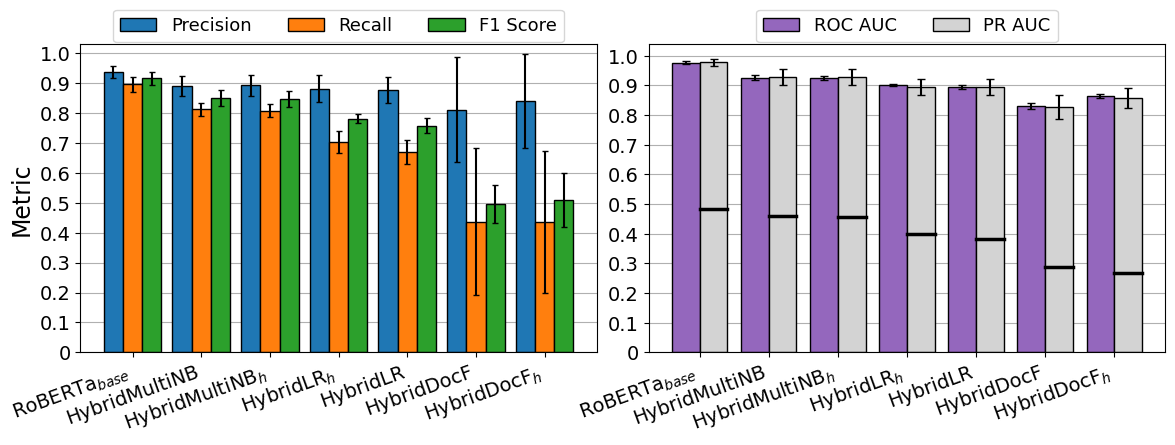

In [8]:
# 1. Cross-validation results: all with stem
model_names_cv = [r'HybridDocF$_{h}$', 
                  r'HybridLR$_{h}$', 
                  r'HybridMultiNB$_{h}$', 
                  r'HybridDocF', 
                  r'HybridLR', 
                  r'HybridMultiNB', 
                  r'RoBERTa$_{base}$']

model_f.plot_cv_from_exp_files(exp_files, 'target_gso', model_names_cv, models_folder)

In [5]:
# Docker (no GPU...)

# 2. Out-of-domain evaluation
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$', r'RoBERTa$_{base}$']
identity_col = 'target_gso'
performance, datasets = defaultdict(lambda: defaultdict(dict)), {}
for dname in ['gabhatecorpus', 'xtremespeech', 'hatexplain']:
    print(f'\n{dname.upper()}')
    df, text_col0, id_col0, identities_dict = dc.import_dataset(dname)
    data, target_cols, text_col, id_col = dc.prepare_for_model_evaluation(
        df, text_col0, id_col0, identities_dict
    )
    if dname == 'xtremespeech':
        # Include only texts in English
        data = data.loc[data['Language'] == 'English']
        print(f'... {data.shape[0]} english texts.')
    # use model_predict for hybrid and transformers, and lexical-based functions.
    for model_name, model in zip(model_names, models):
        print(model_name)
        if model_name == 'Toxic_Debias':
            y_trues = data[identity_col].values
            y_preds, matches = model_f.toxic_debias_predict(model, data, text_col)
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            data[f'{model_name}_y_trues'] = y_trues
            data[f'{model_name}_y_preds'] = y_preds
            data[f'{model_name}_matches'] = matches
        else:
            y_trues, y_preds, interpretations = model_f.model_predict(model, data, identity_col, text_col, id_col)
            y_preds_hard = y_preds >= 0.5
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds_hard], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            if model_name == r'HybridLR$_{h}$':
                # ... save KG interpretations for best performing hybrid model
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
                interpration_cols = [f'{model_name}_{c}' for c in ['pos_matches', 'neg_matches', 'high_syns']]
                data[interpration_cols] = pd.DataFrame(interpretations).transpose()
            if model_name == r'RoBERTa$_{base}$':
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
    prediction_cols = data.columns[-9:].to_list()
    datasets[dname] = data.copy()


GABHATECORPUS
gabhatecorpus imported successfully from data folder: 7813 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
Starting predictions on: ['target_gso']
indexed 7813 documents
... feature extraction


2023-04-04 09:55:08.305635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 09:55:08.306171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]


977/977 [==============================] - 3s 3ms/step
... classification
   uni-output model
HybridLR$_{h}$
Starting predictions on: ['target_gso']
indexed 7813 documents
... feature extraction
 15/977 [..............................] - ETA: 3s  

2023-04-04 09:59:06.828188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 09:59:06.828715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]


977/977 [==============================] - 3s 3ms/step
... classification
   uni-output model
HybridMultiNB$_{h}$
Starting predictions on: ['target_gso']
indexed 7813 documents
... feature extraction
 14/977 [..............................] - ETA: 3s  

2023-04-04 10:03:07.251738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:03:07.252249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]


977/977 [==============================] - 3s 3ms/step
... classification
   uni-output model
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction


2023-04-04 10:03:26.157126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [7813,251]
	 [[{{node Placeholder/_11}}]]
2023-04-04 10:03:26.157691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [7813,251]
	 [[{{node Placeholder/_11}}]]


977/977 [==============================] - 1101s 1s/step
... classification
   uni-output model

XTREMESPEECH
xtremespeech imported successfully from data folder: 5063 annotations samples.
... 2639 english texts.
Toxic_Debias
HybridDocF$_{h}$
Starting predictions on: ['target_gso']
indexed 2639 documents
... feature extraction
 23/330 [=>............................] - ETA: 1s

2023-04-04 10:22:40.507268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:22:40.507802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]


330/330 [==============================] - 1s 3ms/step
... classification
   uni-output model
HybridLR$_{h}$
Starting predictions on: ['target_gso']
indexed 2639 documents
... feature extraction
 34/330 [==>...........................] - ETA: 0s

2023-04-04 10:24:12.327298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:24:12.327827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]


330/330 [==============================] - 1s 3ms/step
... classification
   uni-output model
HybridMultiNB$_{h}$
Starting predictions on: ['target_gso']
indexed 2639 documents
... feature extraction
 35/330 [==>...........................] - ETA: 0s

2023-04-04 10:25:44.378498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:25:44.379032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]


330/330 [==============================] - 1s 3ms/step
... classification
   uni-output model
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction


2023-04-04 10:25:51.002634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2639,251]
	 [[{{node Placeholder/_11}}]]
2023-04-04 10:25:51.003196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2639,251]
	 [[{{node Placeholder/_11}}]]


330/330 [==============================] - 363s 1s/step
... classification
   uni-output model

HATEXPLAIN
hatexplain imported successfully from data folder: 12334 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
Starting predictions on: ['target_gso']
indexed 12334 documents
... feature extraction
  32/1542 [..............................] - ETA: 5s 

2023-04-04 10:34:52.315271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:34:52.315751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]


1542/1542 [==============================] - 5s 3ms/step
... classification
   uni-output model
HybridLR$_{h}$
Starting predictions on: ['target_gso']
indexed 12334 documents
... feature extraction
  35/1542 [..............................] - ETA: 4s 

2023-04-04 10:40:31.929883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:40:31.930442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]


1542/1542 [==============================] - 5s 3ms/step
... classification
   uni-output model
HybridMultiNB$_{h}$
Starting predictions on: ['target_gso']
indexed 12334 documents
... feature extraction
  30/1542 [..............................] - ETA: 5s 

2023-04-04 10:46:04.833724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:46:04.834275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]


1542/1542 [==============================] - 5s 3ms/step
... classification
   uni-output model
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction


2023-04-04 10:46:28.142684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [12334,251]
	 [[{{node Placeholder/_11}}]]
2023-04-04 10:46:28.143253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [12334,251]
	 [[{{node Placeholder/_11}}]]


1542/1542 [==============================] - 1731s 1s/step
... classification
   uni-output model


In [3]:
# Venv with GPU: roberta ok

# 2. Out-of-domain evaluation
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$', r'RoBERTa$_{base}$']
model_names = ['Toxic_Debias', r'RoBERTa$_{base}$']

identity_col = 'target_gso'
performance, datasets = defaultdict(lambda: defaultdict(dict)), {}
for dname in ['gabhatecorpus', 'xtremespeech', 'hatexplain']:
    print(f'\n{dname.upper()}')
    df, text_col0, id_col0, identities_dict = dc.import_dataset(dname)
    data, target_cols, text_col, id_col = dc.prepare_for_model_evaluation(
        df, text_col0, id_col0, identities_dict
    )
    if dname == 'xtremespeech':
        # Include only texts in English
        data = data.loc[data['Language'] == 'English']
        print(f'... {data.shape[0]} english texts.')
    # use model_predict for hybrid and transformers, and lexical-based functions.
    for model_name, model in zip(model_names, models):
        print(model_name)
        if model_name == 'Toxic_Debias':
            y_trues = data[identity_col].values
            y_preds, matches = model_f.toxic_debias_predict(model, data, text_col)
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            data[f'{model_name}_y_trues'] = y_trues
            data[f'{model_name}_y_preds'] = y_preds
            data[f'{model_name}_matches'] = matches
        else:
            y_trues, y_preds, interpretations = model_f.model_predict(model, data, identity_col, text_col, id_col)
            y_preds_hard = y_preds >= 0.5
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds_hard], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            if model_name == r'HybridLR$_{h}$':
                # ... save KG interpretations for best performing hybrid model
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
                interpration_cols = [f'{model_name}_{c}' for c in ['pos_matches', 'neg_matches', 'high_syns']]
                data[interpration_cols] = pd.DataFrame(interpretations).transpose()
            if model_name == r'RoBERTa$_{base}$':
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
    prediction_cols = data.columns[-9:].to_list()
    datasets[dname] = data.copy()


GABHATECORPUS
gabhatecorpus imported successfully from data folder: 7813 annotations samples.
Toxic_Debias
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction


2023-04-04 10:04:27.608380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [7813,251]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:04:27.608909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [7813,251]
	 [[{{node Placeholder/_11}}]]


977/977 [==============================] - 146s 145ms/step
... classification
   uni-output model

XTREMESPEECH
xtremespeech imported successfully from data folder: 5063 annotations samples.
... 2639 english texts.
Toxic_Debias
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction
  1/330 [..............................] - ETA: 1:03

2023-04-04 10:06:56.493651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2639,251]
	 [[{{node Placeholder/_10}}]]
2023-04-04 10:06:56.494227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2639,251]
	 [[{{node Placeholder/_11}}]]


330/330 [==============================] - 48s 144ms/step
... classification
   uni-output model

HATEXPLAIN
hatexplain imported successfully from data folder: 12334 annotations samples.
Toxic_Debias
RoBERTa$_{base}$
Starting predictions on: ['target_gso']
... feature extraction
   1/1542 [..............................] - ETA: 5:52

2023-04-04 10:07:51.521429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [12334,251]
	 [[{{node Placeholder/_11}}]]
2023-04-04 10:07:51.521742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [12334,251]
	 [[{{node Placeholder/_11}}]]


1542/1542 [==============================] - 224s 145ms/step
... classification
   uni-output model


In [ ]:
# Venv with GPU/CPU: hybrid errors (Python 3.9)

# 2. Out-of-domain evaluation
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$', r'RoBERTa$_{base}$']
identity_col = 'target_gso'
performance, datasets = defaultdict(lambda: defaultdict(dict)), {}
for dname in ['gabhatecorpus', 'xtremespeech', 'hatexplain']:
    print(f'\n{dname.upper()}')
    df, text_col0, id_col0, identities_dict = dc.import_dataset(dname)
    data, target_cols, text_col, id_col = dc.prepare_for_model_evaluation(
        df, text_col0, id_col0, identities_dict
    )
    if dname == 'xtremespeech':
        # Include only texts in English
        data = data.loc[data['Language'] == 'English']
        print(f'... {data.shape[0]} english texts.')
    # use model_predict for hybrid and transformers, and lexical-based functions.
    for model_name, model in zip(model_names, models):
        print(model_name)
        if model_name == 'Toxic_Debias':
            y_trues = data[identity_col].values
            y_preds, matches = model_f.toxic_debias_predict(model, data, text_col)
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            data[f'{model_name}_y_trues'] = y_trues
            data[f'{model_name}_y_preds'] = y_preds
            data[f'{model_name}_matches'] = matches
        else:
            y_trues, y_preds, interpretations = model_f.model_predict(model, data, identity_col, text_col, id_col)
            y_preds_hard = y_preds >= 0.5
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds_hard], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            if model_name == r'HybridLR$_{h}$':
                # ... save KG interpretations for best performing hybrid model
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
                interpration_cols = [f'{model_name}_{c}' for c in ['pos_matches', 'neg_matches', 'high_syns']]
                data[interpration_cols] = pd.DataFrame(interpretations).transpose()
            if model_name == r'RoBERTa$_{base}$':
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
    prediction_cols = data.columns[-9:].to_list()
    datasets[dname] = data.copy()


GABHATECORPUS
gabhatecorpus imported successfully from data folder: 7813 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
Starting predictions on: ['target_gso']
Computing weighted entity matching
indexed 7813 documents
  matching entities
create dict from <class 'owlready2.namespace.Ontology'>
create class and individuals: <generator object _GraphManager.classes at 0x7fd9846fbb30>
{'http://purl.bioontology.org/ontology/MESH/C536649': 'http://purl.bioontology.org/ontology/MESH/C536649', 'http://purl.obolibrary.org/obo/GSSO_001544': 'http://purl.obolibrary.org/obo/GSSO_001544', 'http://purl.obolibrary.org/obo/NCIT_C120864': 'http://purl.obolibrary.org/obo/NCIT_C120864', 'http://purl.obolibrary.org/obo/UBERON_0000989': 'http://purl.obolibrary.org/obo/UBERON_0000989', 'http://purl.obolibrary.org/obo/GSSO_001498': 'http://purl.obolibrary.org/obo/GSSO_001498', 'http://purl.obolibrary.org/obo/GSSO_001548': 'http://purl.obolibrary.org/obo/GSSO_001548', 'http://purl.obolibrary.org/obo/UBERO

In [ ]:
# 2. Out-of-domain evaluation
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$', r'RoBERTa$_{base}$']
identity_col = 'target_gso'
performance, datasets = defaultdict(lambda: defaultdict(dict)), {}
for dname in ['gabhatecorpus', 'xtremespeech', 'hatexplain']:
    print(f'\n{dname.upper()}')
    df, text_col0, id_col0, identities_dict = dc.import_dataset(dname)
    data, target_cols, text_col, id_col = dc.prepare_for_model_evaluation(
        df, text_col0, id_col0, identities_dict
    )
    if dname == 'xtremespeech':
        # Include only texts in English
        data = data.loc[data['Language'] == 'English']
        print(f'... {data.shape[0]} english texts.')
    # use model_predict for hybrid and transformers, and lexical-based functions.
    for model_name, model in zip(model_names, models):
        print(model_name)
        if model_name == 'Toxic_Debias':
            y_trues = data[identity_col].values
            y_preds, matches = model_f.toxic_debias_predict(model, data, text_col)
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            data[f'{model_name}_y_trues'] = y_trues
            data[f'{model_name}_y_preds'] = y_preds
            data[f'{model_name}_matches'] = matches
        else:
            y_trues, y_preds, interpretations = model_f.model_predict(model, data, identity_col, text_col, id_col)
            y_preds_hard = y_preds >= 0.5
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds_hard], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            if model_name == r'HybridLR$_{h}$':
                # ... save KG interpretations for best performing hybrid model
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
                interpration_cols = [f'{model_name}_{c}' for c in ['pos_matches', 'neg_matches', 'high_syns']]
                data[interpration_cols] = pd.DataFrame(interpretations).transpose()
            if model_name == r'RoBERTa$_{base}$':
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
    prediction_cols = data.columns[-9:].to_list()
    datasets[dname] = data.copy()


GABHATECORPUS
gabhatecorpus imported successfully from data folder: 7813 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
Starting predictions on: ['target_gso']
Computing weighted entity matching
indexed 7813 documents
  matching entities
create dict from <class 'owlready2.namespace.Ontology'>
create class and individuals: <generator object _GraphManager.classes at 0x7f388c43bd60>


In [6]:
# Table 3: Gab Hate Corpus
dname = 'gabhatecorpus'
performance_ghc = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_ghc)

Performance in: GABHATECORPUS


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,91.81,88.97,58.82,74.82,40.20
HybridDocF$_{h}$,91.13,88.97,51.09,84.58,54.57
HybridLR$_{h}$,90.64,88.97,62.49,89.14,64.09
HybridMultiNB$_{h}$,89.56,88.97,61.62,90.11,68.31
RoBERTa$_{base}$,88.85,88.97,61.55,93.06,70.32


In [7]:
# Table 3: XtremeSpeech
dname = 'xtremespeech'
performance_xp = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_xp)

Performance in: XTREMESPEECH


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,94.01,93.22,52.41,72.96,31.12
HybridDocF$_{h}$,93.86,93.22,53.71,86.92,46.90
HybridLR$_{h}$,90.60,93.22,48.33,87.86,50.85
HybridMultiNB$_{h}$,90.68,93.22,50.00,87.46,52.83
RoBERTa$_{base}$,92.99,93.22,57.67,93.67,57.38


In [8]:
# Table 3: HateXplain
dname = 'hatexplain'
performance_hx = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_hx)

Performance in: HATEXPLAIN


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,84.43,76.66,67.36,79.01,52.66
HybridDocF$_{h}$,79.28,76.66,43.92,78.62,56.17
HybridLR$_{h}$,83.38,76.66,67.50,87.85,67.78
HybridMultiNB$_{h}$,85.57,76.66,73.42,91.41,78.80
RoBERTa$_{base}$,89.91,76.66,80.22,95.60,86.46


In [9]:
prediction_cols

['Toxic_Debias_y_preds',
 'Toxic_Debias_matches',
 'HybridLR$_{h}$_y_trues',
 'HybridLR$_{h}$_y_preds',
 'HybridLR$_{h}$_pos_matches',
 'HybridLR$_{h}$_neg_matches',
 'HybridLR$_{h}$_high_syns',
 'RoBERTa$_{base}$_y_trues',
 'RoBERTa$_{base}$_y_preds']

## Error and Entity Analyses

In [10]:
error_analysis_col, model_name = [id_col] + prediction_cols, r'HybridLR$_{h}$'
error_col, true_col = f'error_sample_{model_name}', f'true_sample_{model_name}'

In [11]:
# Export csv for error analysis (with predictions and sample columns: errors, trues)
for dname, data in datasets.items():
    print(dname.upper())
    data = sample_error_partition(data, f'{model_name}_y_trues', f'{model_name}_y_preds', id_col, error_col, 100, 0.25)
    data = sample_true_partition(data, f'{model_name}_y_trues', f'{model_name}_y_preds', id_col, true_col, 100, 0.125)
    data[error_analysis_col+[error_col, true_col]].to_csv(os.path.join(models_folder, 'interpretations', f'{dname}_predictions.csv'), index=False)

GABHATECORPUS
 adding 24 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
XTREMESPEECH
 adding 4 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 14 samples
 adding 19 samples
 adding 25 samples
 adding 25 samples
HATEXPLAIN
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples
 adding 25 samples


In [12]:
# Import xlsx error analysis results and print Table 4
categories_col = 'Error_Categories'
error_samples, true_samples = [], []
for dname in dnames:
    data = pd.read_excel(os.path.join(models_folder, 'interpretations', 'error_analysis', f'{dname}_predictions.xlsx'))
    data['dataset'] = [f'{dname}'] * data.shape[0]
    error_sample, true_sample = data.loc[data[error_col] == 1].copy(), data.loc[data[true_col] == 1].copy()
    error_samples.append(error_sample)
    true_samples.append(true_sample)
error_sample = pd.concat(error_samples)
fp, fn = error_sample.loc[error_sample['HybridLR$_{h}$_y_trues']==0], error_sample.loc[error_sample['HybridLR$_{h}$_y_trues']==1]
print(f'TABLE 4\n{"*"*23}')
print(f'FP Errors:\n{fp[categories_col].value_counts()}')
print('')
print(f'FN Errors:\n{fn[categories_col].value_counts()}')

TABLE 4
***********************
FP Errors:
strong demographic descriptor (annotation)    117
targeted language (annotation)                 20
weak demographic descriptor (annotation)       10
false match method driven                       3
Name: Error_Categories, dtype: int64

FN Errors:
method under-representation    50
no reference                   26
missed content driven          19
method noise                   12
method incomplete              11
method less distinctive         7
method black-box                4
method noise                    1
Name: Error_Categories, dtype: int64


In [13]:
# Print linguistic markers using functions in helper: Table 5

# ... import true/error samples
true_sample=pd.concat(true_samples)

# ... find most important features (annotation, model, trues)
all_matches, entity_weights, disc_entities = {}, {}, {}
err_types = {'annot': ['demographic descriptor', 'targeted language'],
             'model': ['method under-representation', 'method less distinctive']}
all_matches['annotation'] = entities_in_categories(fp, err_types['annot'], categories_col, id_col, model_name)
all_matches['model'] = entities_in_categories(fn, err_types['model'], categories_col, id_col, model_name)
all_matches['trues'] = [entity for pos_entities in true_sample[f'{model_name}_pos_matches'].dropna().to_list()
                        for entity in pos_entities.split(';')]
print(f'ALL MATCHES\n{"*"*23}')
for sample, entities in all_matches.items():
    all_matches[sample] = Counter(entities).most_common()
    print(f'  {sample}:\n{all_matches[sample]}')

print(f'Feature Importance\n{"*"*23}')
weights_dict, exclude = model_f.get_vocab_weights(models[model_names.index(model_name)])
for sample, entities_count in all_matches.items():
    entity_weights[sample] = sorted([(entity, weights_dict[entity], count) for entity, count in entities_count if entity not in exclude], 
                                     key=lambda x: (-x[1], -x[2]))
    print(f'  {sample}:\n{entity_weights[sample]}')


xtremespeech     50
hatexplain       50
gabhatecorpus    47
Name: dataset, dtype: int64
hatexplain       23
gabhatecorpus    21
xtremespeech     13
Name: dataset, dtype: int64
ALL MATCHES
***********************
  annotation:
[('woman', 74), ('man', 47), ('singular they', 19), ('hers', 19), ('her', 19), ("her'n", 19), ('white identity', 17), ('womanism', 16), ("y'all", 15), ('World Health Organization', 14), ('salpingo-oophorectomy', 14), ('she', 14), ('he', 12), ('s/he', 12), ('hes', 12), ('child', 12), ('Muslim', 12), ('bitch', 9), ('justice', 9), ('fuck', 9), ('rape', 9), ('his', 8), ('hi', 8), ('sex', 8), ('sexual intercourse', 8), ('headache', 8), ('gay', 8), ('killing', 7), ('Kenya', 7), ('myalgic encephalomyelitis', 7), ('me', 7), ('Black identity', 7), ('.gay', 7), ('heterosexual', 7), ('asexual and homoromantic person', 7), ('gai', 7), ('A-Gay', 7), ('gay identity', 7), ('him', 6), ('Hypertext Transfer Protocol', 6), ('love', 6), ('person', 6), ('look', 6), ('user', 6), ('numb

  annotation:
[('woman', 7.7, 74), ('man', 7.63, 47), ('LGBT', 5.97, 1), ('woman of color', 4.83, 1), ('.lgbt', 4.39, 1), ('man who has sex with men', 4.33, 1), ('r/lgbt', 4.19, 1), ('male gender identity', 4.13, 4), ('female gender identity', 3.89, 2), ('.gay', 3.49, 7), ('gay', 2.77, 8), ('gay person', 2.58, 2), ('heterosexual', 2.51, 7), ('homosexuality', 2.49, 1), ('feminist', 2.48, 2), ('lesbian', 2.42, 2), ('asexual and homoromantic person', 2.39, 7), ('gai', 2.39, 7), ('employment', 2.37, 1), ('A-Gay', 2.32, 7), ('gay identity', 2.26, 7), ('human homosexuality', 2.21, 1), ('queer sexual orientation', 2.15, 2), ('ability', 2.13, 2), ('continuant', 2.1, 1), ('transgender', 2.09, 1), ('same-gender marriage', 2.06, 1), ('marriage', 2.0, 1), ('interpersonal orientation', 1.95, 1), ('womanism', 1.85, 16), ('lesbian identity', 1.79, 1), ('sexuality', 1.77, 3), ('person', 1.7, 6), ('homosexualism', 1.69, 2), ('personal identity', 1.69, 1), ('lesbianism', 1.69, 1), ('homophobia', 1.64, 2

Filtered by Elbow
***********************
  annotation:
['woman', 'man', 'LGBT', 'woman of color', '.lgbt', 'man who has sex with men', 'r/lgbt', 'male gender identity', 'female gender identity', '.gay', 'gay', 'gay person', 'heterosexual', 'homosexuality', 'feminist', 'lesbian', 'asexual and homoromantic person', 'gai', 'employment', 'A-Gay', 'gay identity', 'human homosexuality', 'queer sexual orientation', 'ability', 'continuant', 'transgender', 'same-gender marriage', 'marriage', 'interpersonal orientation', 'womanism', 'lesbian identity', 'sexuality', 'person', 'homosexualism', 'personal identity', 'lesbianism', 'homophobia', 'queer identity', 'user', 'person with a pedophilic disorder', 'single person', 'abusive person', 'sex', 'member of an organization', 'exposure', 'interpersonal attraction', 'murder victim', 'information content entity']
  model:
['man who has sex with men', 'feminist', 'continuant', 'marriage', 'suicide', 'person', 'homophobia', 'identity', 'person who menst

,0
annotation,"woman, man, LGBT, woman of color, .lgbt, man who has sex with men, r/lgbt, male gender identity, female gender identity, .gay, gay, gay person, heterosexual, homosexuality, feminist, lesbian, asexual and homoromantic person, gai, A-Gay, gay identity, human homosexuality, queer sexual orientation, transgender, same-gender marriage, marriage, interpersonal orientation, womanism, lesbian identity, sexuality, homosexualism, personal identity, lesbianism, homophobia, queer identity, single person, abusive person, sex, interpersonal attraction, murder victim, partner, faggot, semen, pussy, hers, bitch"
model,"man who has sex with men, feminist, marriage, homophobia, person who menstruates, sex, interracial marriage, sex work client, marital partner, parent, sex worker, fag, faggot, rapist, female gender role, pussy, abortion, morphological enlargement, hers, vagina, penis, thot, rape, domestic violence, she, bimbo, sexual abstinence, cunt, bitch, he, whore, slut, fuck, Mrs., rainbow flag"
trues,"woman, man, LGBTQ, LGBT, .lgbt, man who has sex with men, r/lgbt, male gender identity, lesbian woman, female gender identity, gay man, .gay, transgender person, Black man, gay, homo, gay person, gender, heterosexual, homosexuality, feminist, lesbian, asexual and homoromantic person, gai, A-Gay, heterosexual person, gay identity, human homosexuality, sak veng, queer sexual orientation, transgender, same-gender marriage, marriage, transgenderism, heterosexuality, womanism, pederasty, lesbian identity, sexuality, heterosexual identity, homosexualism, lesbianism, personal identity, homophobia, queer identity, person who menstruates, mixed-orientation marriage, single person, sex, feminism, partner, marital partner, sex worker, fag, faggot, masculism, pussy, hers, thot, rape, menstruation, bitch"


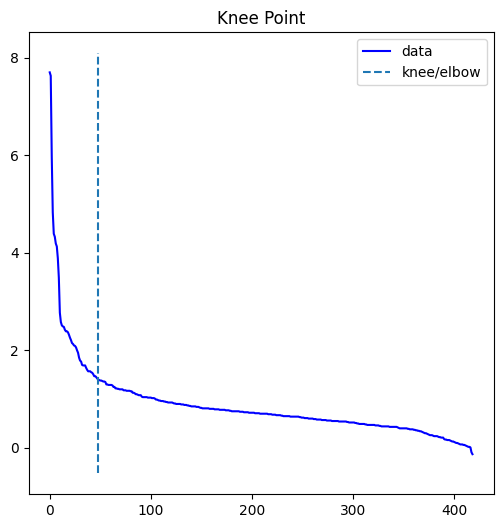

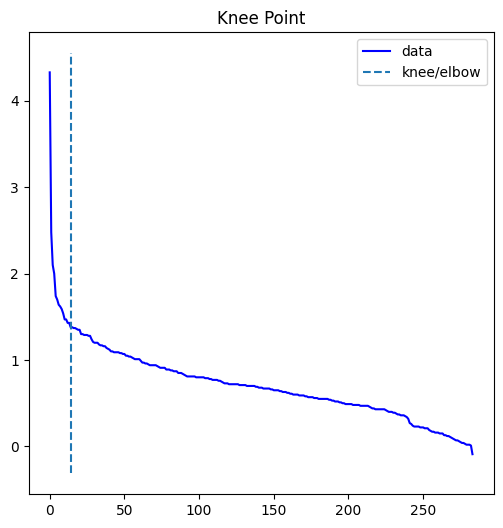

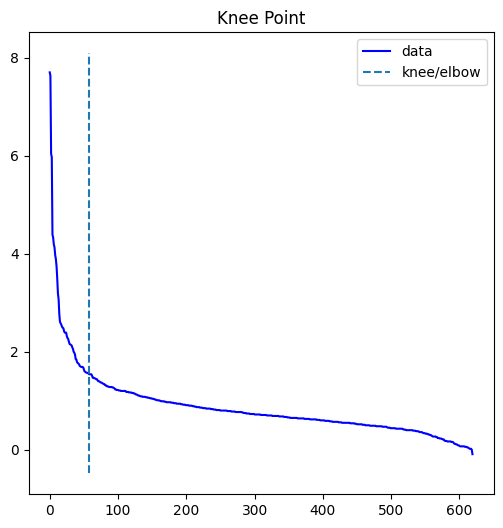

In [14]:
# ... filter using elbow method
print(f'Filtered by Elbow\n{"*"*23}')
for sample, entities_weight_count in entity_weights.items():
    sorted_weights = [weight for ent, weight, c in entities_weight_count]
    elbow_point = find_elbow(sorted_weights)
    disc_entities[f'{sample}'] = [ent for ent, weight, count in entity_weights[sample][:elbow_point]]
    print(f'  {sample}:\n{disc_entities[sample]}')

# ... manually find missing entities (italics > save only cols interest)
lm, lm0 = {}, {}
to_remove = {'too_general': ['object', 'ability', 'person', 'user', 'employment', 'continuant', 'member of an organization', 'information content entity','person with a disability'],
             'too_specific':  ['cause of death', 'advocate', 'suicide', 'style', 'person with a pedophilic disorder', 'exposure', 'identity', 'diversity']}
for sample in entity_weights.keys():
    lm0[sample] = [entity for entity in disc_entities[f'{sample}'] if entity not in to_remove['too_general']+to_remove['too_specific']]
for sample, lms in lm0.items():
    if sample == 'annotation':
        missed_sample = fp.copy()
    elif sample == 'model':
        missed_sample = fn.copy()
    elif sample == 'trues':
        missed_sample = true_sample.copy()
    missed_sample[sample] = missed_sample.apply(lambda row: list(set(str(row[f'{model_name}_pos_matches']).split(';')).intersection(set(lms))), axis=1)
    missed_sample[f'missed_{sample}'] = missed_sample[sample].apply(lambda matches: 1 if len(matches)==0 else 0)
    print(f'{sample}: {missed_sample.shape[0]} missed.')
    missed_sample.loc[missed_sample[f'missed_{sample}']==1].to_csv(os.path.join(models_folder, 'interpretations', 'entities_analysis',f'missed_{sample}.csv'), index=False)  
# entities in italics
to_add = {'annotation': ['hers', 'pussy', 'faggot', 'semen', 'bitch', 'partner'],
          'model': ['whore', 'faggot', 'fag', 'rapist', 'parent', 'sex worker', 'marital partner', 'cunt', 'she', 'penis', 'abortion', 'bimbo', 'slut', 'vagina', 'female gender role', 'hers', 'he', 'fuck', 'Mrs.', 'sexual abstinence', 'morphological enlargement', 'pussy', 'rainbow flag', 'bitch','domestic violence', 'rape', 'thot'],
          'trues': ['fag', 'pussy', 'hers', 'faggot', 'masculism', 'feminism', 'bitch', 'marital partner', 'sex worker', 'sex', 'partner', 'rape', 'menstruation', 'thot']}
# ... print Table 5
print(f'TABLE 5: \n{"*"*23}')
table_5 = {}
for sample, entities in lm0.items():
    lm[sample] = entities + [entity for entity,_,_ in entity_weights[sample] if entity in to_add[sample]]
    print('{}: {}'.format(sample, len(lm[sample])))
    table_5[sample] = ', '.join(lm[sample])
display(pd.DataFrame.from_dict(table_5, orient='index'))